In [18]:
using DynamicalSystems
using Plots
using Flux
using Flux: @epochs
using LinearAlgebra
# Graphs 
using LightGraphs, SimpleWeightedGraphs
using GraphPlot
gr()

Plots.GRBackend()

### Lorenz System

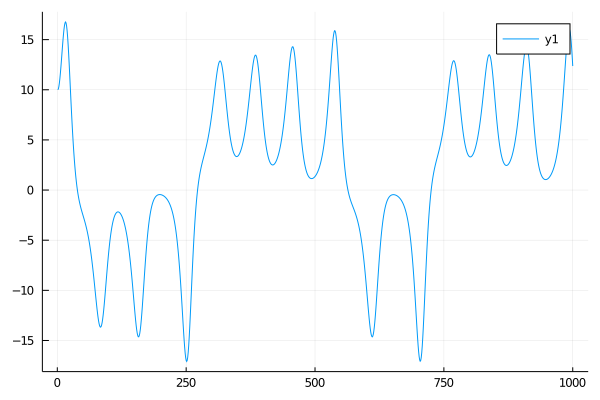

In [99]:
T = 1000
lorenz = DynamicalSystemsBase.Systems.lorenz([10.0, 10.0, 10.0]; σ = 10.0, ρ = 28.0, β = 8/3);
u = trajectory(lorenz, 20.0; dt = 0.01)
plot(u[1:T,1])

### Reservoir

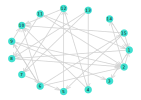

In [118]:
Dᵣ = 15
#G = erdos_renyi(Dᵣ, 0.2, is_directed=true)
while true
    
    G = erdos_renyi(Dᵣ, 0.2, is_directed=true)
    
    if is_connected(G) == true && maximum(abs.(eigvals(Array(adjacency_matrix(G))))) <1.3 && maximum(abs.(eigvals(Array(adjacency_matrix(G)))))>1.1
        break
    end
    
end
gplot(G, layout=circular_layout, nodelabel=1:Dᵣ)

### Adjacency matrix

In [119]:
A = adjacency_matrix(G);
Wᵢₙ = rand(0:100, Dᵣ, 3)*0.0005;
maximum(abs.(eigvals(Array(A))))

1.2207440846057578

### Equation of motion reservoir + driving

In [124]:
function loop(r, p, t)
    A = p[1]; Wᵢₙ = p[2]
    rₜ₊₁ = []
    for i ∈ 1:Dᵣ
        rₜ₊₁ = append!(rₜ₊₁, tanh((Array(A[i,:])' * r) + (Array(Wᵢₙ[i,:])' * u[t])))
    end
    return SVector{Dᵣ}(rₜ₊₁)
end

loop (generic function with 1 method)

### Discrete dynamical system

In [125]:
p = [A, Wᵢₙ]
Reservoir = DiscreteDynamicalSystem(loop, zeros(15), p; t0 = 1);

In [126]:
tr = trajectory(Reservoir, T-1)

15-dimensional Dataset{Float64} with 1000 points
 0.0       0.0       0.0       0.0       …  0.0       0.0       0.0
 0.735222  0.5546    0.646929  0.769867     0.561485  0.46604   0.830579
 0.976708  0.952365  0.690498  0.982375     0.988385  0.860249  0.996258
 0.989506  0.987397  0.732325  0.989924     0.998156  0.920767  0.998962
 0.993015  0.990042  0.771836  0.992215     0.998856  0.931512  0.999271
 0.994673  0.991268  0.808448  0.99391   …  0.999079  0.94034   0.999469
 0.995922  0.992377  0.841617  0.995257     0.999247  0.948383  0.999616
 0.996875  0.9934    0.870907  0.996308     0.999381  0.955755  0.999726
 0.997593  0.994323  0.896059  0.997106     0.999488  0.962392  0.999804
 0.998127  0.995136  0.917031  0.997696     0.999573  0.968238  0.99986
 0.998519  0.995834  0.933999  0.99812   …  0.999639  0.973265  0.999898
 0.998802  0.996419  0.947324  0.998411     0.999688  0.977475  0.999924
 0.999003  0.996895  0.957478  0.998597     0.999724  0.980902  0.999941
 ⋮      

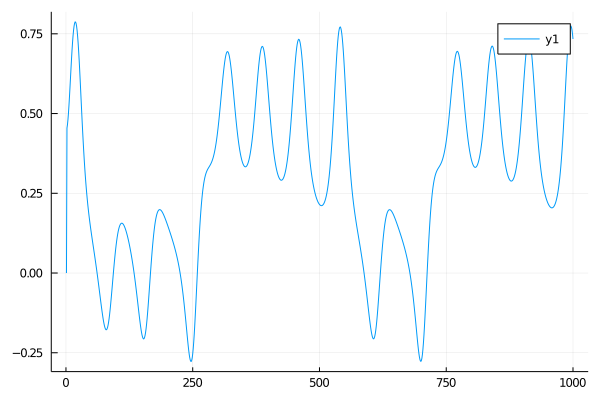

In [131]:
plot(tr[:,10])

In [132]:
Φ = Chain(Dense(Dᵣ,3)) 
loss(x,y) = sum(abs2, Φ(x) .- y)
ps = Flux.params(Φ);

start_train = 20

data = zip(tr[start_train:end], u[start_train:end]);
loss(tr[10], u[10])
@epochs 30000 Flux.train!(loss, ps, data, ADAM(0.01))

┌ Info: Epoch 1
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 2
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 3
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 4
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 5
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 6
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 7
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 8
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 9
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 10
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\src\optimise\train.jl:121
┌ Info: Epoch 11
└ @ Main C:\Users\valpe\.julia\packages\Flux\Fj3bt\s

In [133]:
test = []
for i ∈ 1:T
    test = push!(test, Φ(tr[i,:])[1])
end
loss(tr[10], u[10])

48.76525287988818

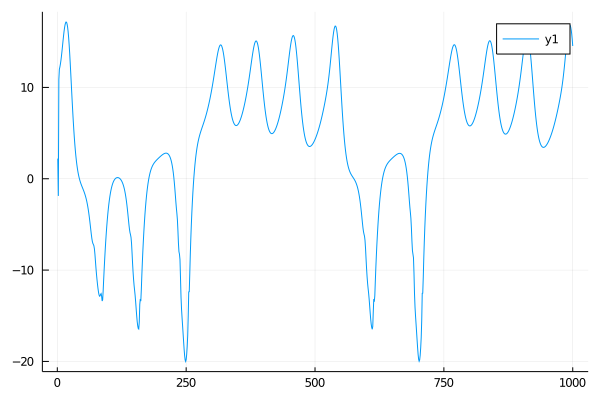

In [134]:
plot(test)

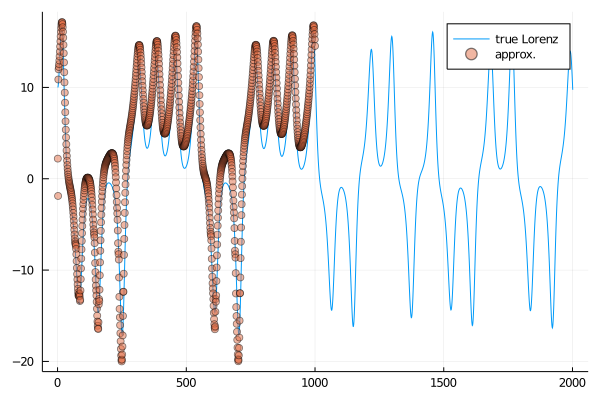

In [135]:
plot(u[1:end,1], label = "true Lorenz")
scatter!(test, alpha = 0.5, label = "approx.")

### Prediction

### Lorenz System

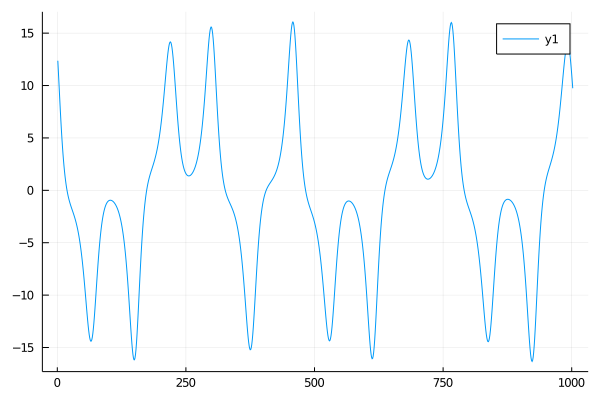

In [70]:
lorenz = DynamicalSystemsBase.Systems.lorenz([10.0, 10.0, 10.0]; σ = 10.0, ρ = 28.0, β = 8/3);
u = trajectory(lorenz, 20.0; dt = 0.01)
plot(u[1000:end,1])

In [68]:
function loop_test(r, p, t)
    A = p[1]; Wᵢₙ = p[2]
    rₜ₊₁ = []
    for i ∈ 1:Dᵣ
        rₜ₊₁ = append!(rₜ₊₁, tanh((Array(A[i,:])' * r) + (Array(Wᵢₙ[i,:])' * Φ(r))))
    end
    return SVector{10}(rₜ₊₁)
end

loop_test (generic function with 1 method)

In [74]:
Reservoir = DiscreteDynamicalSystem(loop_test, tr[end], p; t0 = 1);

In [77]:
tr_predict = trajectory(Reservoir, 1000-1)

10-dimensional Dataset{Float64} with 1000 points
  0.955415   0.999167   0.524694   …   0.976894   0.993638   0.991826
  0.949989   0.999065   0.500533       0.970633   0.990775   0.990113
  0.944558   0.998925   0.474325       0.967231   0.988212   0.988792
  0.938296   0.998748   0.445184       0.96384    0.984889   0.987316
  0.930637   0.998508   0.411932       0.960105   0.980343   0.985531
  0.92091    0.998162   0.373145   …   0.95572    0.973887   0.983244
  0.908119   0.997623   0.327132       0.950352   0.964455   0.98017
  0.89073    0.996716   0.271936       0.943615   0.950428   0.975851
  0.866319   0.995026   0.205449       0.935119   0.929524   0.969523
  0.831026   0.991484   0.125738       0.924601   0.899023   0.959866
  0.778834   0.982989   0.0317559  …   0.911925   0.856564   0.944417
  0.700906   0.959654  -0.075381       0.895986   0.800312   0.917856
  0.585446   0.890028  -0.19028        0.870386   0.723837   0.866376
  ⋮                                ⋱      

In [83]:
test_predict = []
for i ∈ 1:1000
    test_predict = push!(test_predict, Φ(tr_predict[i,:])[3])
end

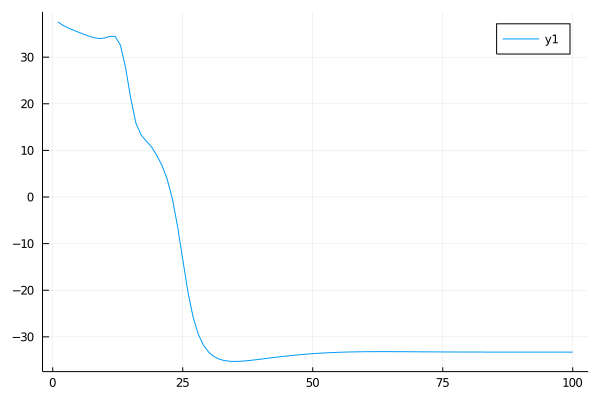

In [85]:
plot(test_predict[1:100])